<a href="https://colab.research.google.com/github/TheMaskGuy04/Machine-Learning/blob/main/Ml_Exp_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Miral Gudhka  BE CMPN A 21102A0064

#Github Link: [Click here](https://github.com/TheMaskGuy04/Machine-Learning/blob/main/ML_Exp_8.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!unzip "/content/drive/MyDrive/VIT Sem VII/ML/ML Exp 8.zip" -d "/content/"

Archive:  /content/drive/MyDrive/VIT Sem VII/ML/ML Exp 8.zip
  inflating: /content/Mall_Customers.csv  


In [4]:
customer_data = pd.read_csv("/content/Mall_Customers.csv")
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

In [41]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.36, min_samples=4)

dbscan.fit(X_scaled)

DBSCAN(eps=0.36, min_samples=4)

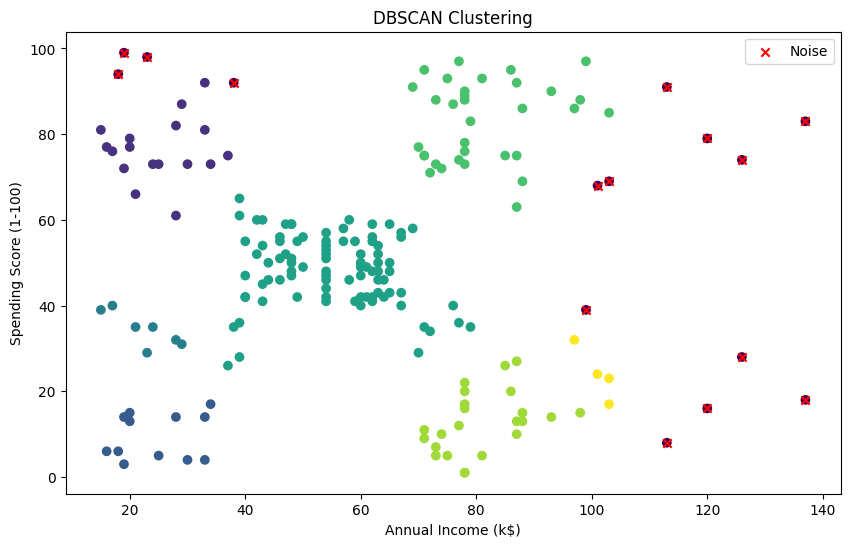

In [42]:
labels = dbscan.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')

plt.scatter(X[labels == -1]['Annual Income (k$)'], X[labels == -1]['Spending Score (1-100)'],
            marker='x', color='red', label='Noise')

plt.legend()
plt.show()

In [43]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

for i in set(labels):
  if i == -1:
    print(f"Cluster {i}: Noise points")
  else:
    cluster_data = X[labels == i]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    print(f"Cluster {i}: Average Income: {avg_income:.2f}, Average Spending: {avg_spending:.2f}")

Estimated number of clusters: 7
Estimated number of noise points: 15
Cluster 0: Average Income: 25.24, Average Spending: 76.35
Cluster 1: Average Income: 24.58, Average Spending: 9.58
Cluster 2: Average Income: 22.43, Average Spending: 34.43
Cluster 3: Average Income: 55.02, Average Spending: 48.33
Cluster 4: Average Income: 81.06, Average Spending: 83.00
Cluster 5: Average Income: 80.96, Average Spending: 12.78
Cluster 6: Average Income: 101.00, Average Spending: 24.00
Cluster -1: Noise points
